## Dependency

download data - https://drive.google.com/file/d/1U6RtBhML-Lj0w2suve0UhQmwcF5pfJCm/view

In [6]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Visualizing data

In [4]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

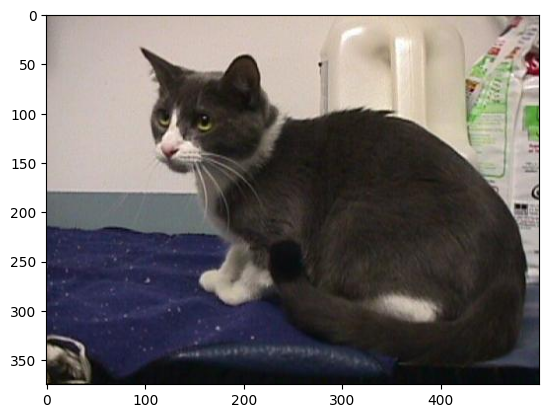

In [7]:
plt.imshow(cat4)

In [8]:
cat4.shape

(375, 500, 3)

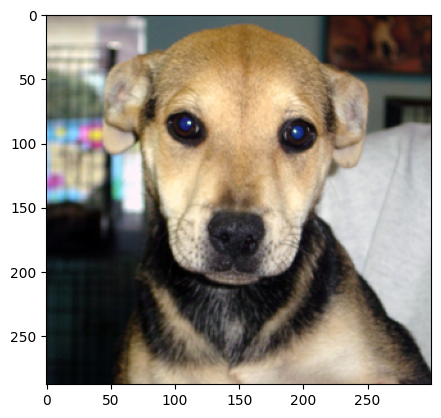

In [13]:
dog4 = cv2.imread('CATS_DOGS/train/DOG/4.jpg')
dog4 = cv2.cvtColor(dog4, cv2.COLOR_BGR2RGB)
plt.imshow(dog4)

# Prepare data for model
all images are different sizes so we have to pre-process the data to fit same size.

In [15]:
#imagedata generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
image_gen = ImageDataGenerator(
    rotation_range = 30, #randomly rotation of images 
    width_shift_range = 0.1, #randomly resize image by 0.1%
    height_shift_range = 0.1,
    rescale = 1/255, #this will scale image data from 0-1
    shear_range = 0.2, #actually cuts waights of image- crop it
    zoom_range = 0.2 ,
    horizontal_flip = True,  # we are not training vertical flip
    fill_mode = 'nearest'
)

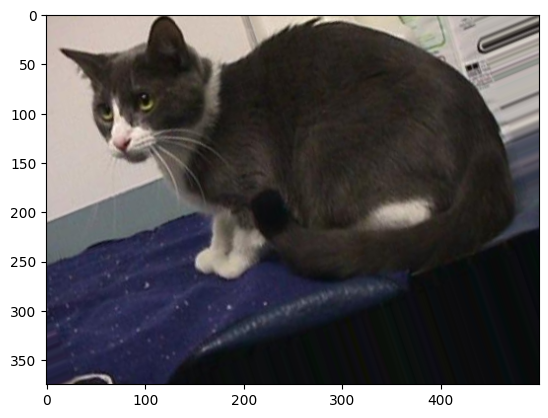

In [22]:
#example of generated image
plt.imshow(image_gen.random_transform(cat4))

In [23]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


## Building our model now!

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [25]:
input_shape = (150, 150, 3)

In [31]:
#building model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

/Users/himalaypatel/Documents/HimalayWork/Learning/OpenCV-Tenserflow/env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
batch_size = 16

train_image_gen  = image_gen.flow_from_directory('CATS_DOGS/train', 
                                                 target_size= input_shape[:2],
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [37]:
test_image_gen  = image_gen.flow_from_directory('CATS_DOGS/test', 
                                                 target_size= input_shape[:2],
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [38]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

it shows 0 for cat and 1 for dog

In [45]:
results = model.fit(
    train_image_gen, epochs = 50, steps_per_epoch = 150, validation_data = test_image_gen,validation_steps = 12
)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 34s 222ms/step - accuracy: 0.6685 - loss: 0.6083 - val_accuracy: 0.7344 - val_loss: 0.5364
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 34s 226ms/step - accuracy: 0.6899 - loss: 0.6160 - val_accuracy: 0.6771 - val_loss: 0.5742
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 218ms/step - accuracy: 0.6732 - loss: 0.5987 - val_accuracy: 0.7240 - val_loss: 0.5576
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - accuracy: 0.6892 - loss: 0.5949 - val_accuracy: 0.7448 - val_loss: 0.5618
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - accuracy: 0.6995 - loss: 0.6009 - val_accuracy: 0.7292 - val_loss: 0.5516
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - accuracy: 0.7018 - loss: 0.5836 - val_accuracy: 0.6667 - val_loss: 0.5965
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - accuracy: 0.6982 - loss: 0.5665 - val_accuracy: 0.6719 - val_loss: 0.5820
Epoch 8/50
122/150 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.7171 - loss: 0.

2024-08-11 13:23:22.860505: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 180ms/step - accuracy: 0.7181 - loss: 0.5676 - val_accuracy: 0.7552 - val_loss: 0.4923
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 216ms/step - accuracy: 0.7414 - loss: 0.5282 - val_accuracy: 0.7031 - val_loss: 0.5589
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 219ms/step - accuracy: 0.7177 - loss: 0.5511 - val_accuracy: 0.6875 - val_loss: 0.5607
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - accuracy: 0.7338 - loss: 0.5562 - val_accuracy: 0.7240 - val_loss: 0.5190
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 215ms/step - accuracy: 0.7060 - loss: 0.5474 - val_accuracy: 0.7135 - val_loss: 0.5277
Epoch 13/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 218ms/step - accuracy: 0.7480 - loss: 0.5124 - val_accuracy: 0.7240 - val_loss: 0.5561
Epoch 14/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 215ms/step - accuracy: 0.7286 - loss: 0.5412 - val_accuracy: 0.7500 - val_loss: 0.4656
Epoch 15/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 234ms/step - accuracy: 0.7459 - loss: 0.5255

2024-08-11 13:27:40.356202: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 178ms/step - accuracy: 0.7346 - loss: 0.5103 - val_accuracy: 0.7031 - val_loss: 0.5496
Epoch 17/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - accuracy: 0.7347 - loss: 0.5344 - val_accuracy: 0.7500 - val_loss: 0.5318
Epoch 18/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - accuracy: 0.7632 - loss: 0.5128 - val_accuracy: 0.8177 - val_loss: 0.3951
Epoch 19/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - accuracy: 0.7556 - loss: 0.5079 - val_accuracy: 0.7083 - val_loss: 0.5418
Epoch 20/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 215ms/step - accuracy: 0.7522 - loss: 0.5119 - val_accuracy: 0.7604 - val_loss: 0.4944
Epoch 21/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - accuracy: 0.7595 - loss: 0.5104 - val_accuracy: 0.7865 - val_loss: 0.4950
Epoch 22/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - accuracy: 0.7619 - loss: 0.5118 - val_accuracy: 0.7604 - val_loss: 0.5047
Epoch 23/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 34s 225ms/step - accuracy: 0.7558 - loss: 0.492

2024-08-11 13:36:16.466253: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 184ms/step - accuracy: 0.7644 - loss: 0.5090 - val_accuracy: 0.7604 - val_loss: 0.4829
Epoch 33/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 214ms/step - accuracy: 0.7642 - loss: 0.4735 - val_accuracy: 0.7290 - val_loss: 0.4870
Epoch 34/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 38s 254ms/step - accuracy: 0.7596 - loss: 0.4889 - val_accuracy: 0.7917 - val_loss: 0.4474
Epoch 35/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 245ms/step - accuracy: 0.7495 - loss: 0.4915 - val_accuracy: 0.7396 - val_loss: 0.4579
Epoch 36/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 242ms/step - accuracy: 0.7664 - loss: 0.4948 - val_accuracy: 0.8177 - val_loss: 0.4476
Epoch 37/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 245ms/step - accuracy: 0.7592 - loss: 0.5011 - val_accuracy: 0.7500 - val_loss: 0.5353
Epoch 38/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 242ms/step - accuracy: 0.8018 - loss: 0.4366 - val_accuracy: 0.7240 - val_loss: 0.5559
Epoch 39/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 230ms/step - accuracy: 0.7764 - loss: 0.468

In [41]:
import warnings
warnings.filterwarnings('ignore')


In [46]:
results.history['accuracy']

[0.6866666674613953,
 0.6862499713897705,
 0.6725219488143921,
 0.6962500214576721,
 0.6912500262260437,
 0.7058333158493042,
 0.7004166841506958,
 0.7223360538482666,
 0.7454166412353516,
 0.7191666960716248,
 0.7429166436195374,
 0.7316666841506958,
 0.7316666841506958,
 0.7356754541397095,
 0.7416666746139526,
 0.7259221076965332,
 0.7408333420753479,
 0.7565872073173523,
 0.747083306312561,
 0.7479166388511658,
 0.7612500190734863,
 0.7649999856948853,
 0.7554166913032532,
 0.7566598653793335,
 0.7450000047683716,
 0.7587500214576721,
 0.7641666531562805,
 0.7620833516120911,
 0.7629166841506958,
 0.7611877918243408,
 0.7720833420753479,
 0.7658811211585999,
 0.7691666483879089,
 0.7553324699401855,
 0.7562500238418579,
 0.7608333230018616,
 0.7720833420753479,
 0.7829166650772095,
 0.7754166722297668,
 0.7868852615356445,
 0.7749999761581421,
 0.7895833253860474,
 0.7883333563804626,
 0.7720833420753479,
 0.7820833325386047,
 0.7774999737739563,
 0.7958333492279053,
 0.79104477167